In [113]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [114]:
clinical_path = os.path.join("raw_data","clinicaltrial_data.csv")
mouse_path = os.path.join("raw_data","mouse_drug_data.csv")

clinical_df = pd.read_csv(clinical_path)
mouse_df = pd.read_csv(mouse_path)
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [115]:
#must merge two dataframes in order to tie drug info into clinical time course info
timecourse_results = pd.merge(clinical_df,mouse_df,on="Mouse ID")

In [116]:
timecourse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [176]:
#groupby drug in order to get the datasets we need to plot info
groupedCourses = timecourse_results.groupby(["Drug","Timepoint"])

tp = pd.DataFrame(groupedCourses["Tumor Volume (mm3)"].mean())
      #timepoints = pd.merge(tp, tp, on ="Drug")
tp = tp.reset_index("Drug")
tp = tp.pivot(columns="Drug")
tp.columns = tp.columns.droplevel()

timepointError = pd.DataFrame(groupedCourses["Tumor Volume (mm3)"].sem())
timepointError = timepointError.reset_index("Drug")
timepointError = timepointError.pivot(columns="Drug")
timepointError = timepointError.columns.droplevel()

drugs = tp.keys()
times = tp["Capomulin"].keys()
cap = tp[drugs[1]].values
cap

array([ 45.        ,  46.50305096,  48.28512522,  50.09405489,
        52.1570485 ,  54.28767406,  56.76951721,  58.82754783,
        61.46789545,  64.13242134])

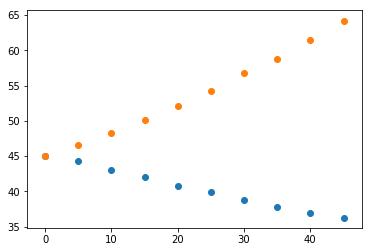

In [179]:
#make scatter plot(includes calculating SEM)


plt.scatter(times, tp[drugs[0]].values)
plt.scatter(times, tp[drugs[1]].values)



plt.show()

